c:\Users\ADMIN\miniconda3\envs\astro_env\lib\site-packages\skimage\registration\_phase_cross_correlation.py:119: RuntimeWarning: overflow encountered in scalar multiply
  amp = src_amp * target_amp
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ADMIN\miniconda3\envs\astro_env\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "c:\Users\ADMIN\miniconda3\envs\astro_env\lib\tkinter\__init__.py", line 839, in callit
    func(*args)
  File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21380\3586588065.py", line 1159, in _show_all_results_windows
    self._create_or_update_main_result_window()
  File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21380\3586588065.py", line 1264, in _create_or_update_main_result_window
    self.main_result_window.title(f"Nh√≥m '{current_seq_id}': B·∫£n ƒê·ªì ƒê·ªô Ph√¢n C·ª±c & G√≥c Ph√¢n C·ª±c")
  File "c:\Users\ADMIN\miniconda3\envs\astro_env\lib\tkinter\__init__.py", line 2255, in wm_title
  

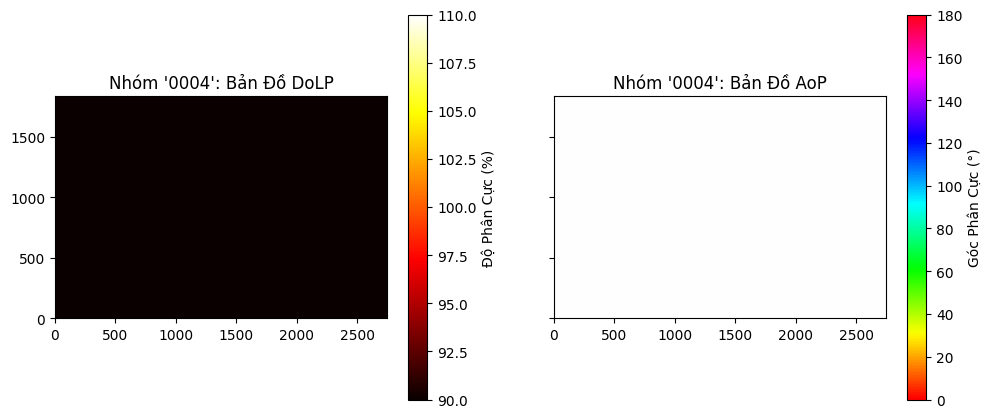

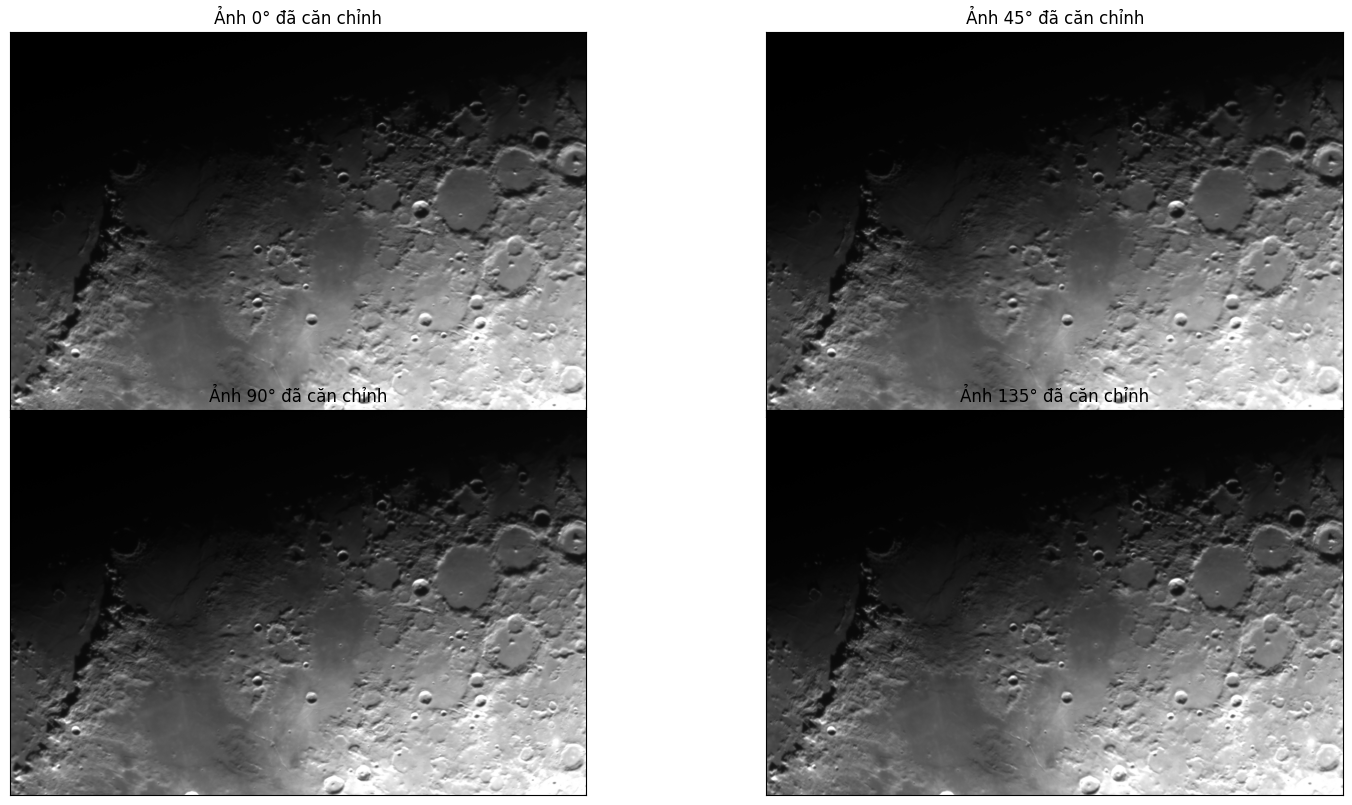

In [ ]:
#!/usr/bin/env python3
"""
Polarization Image Processing Notebook
X·ª≠ l√Ω ·∫£nh ph√¢n c·ª±c

This notebook provides an interactive interface to:
1. Select a folder containing polarization FITS files
2. Process 4 polarization images (0¬∞, 45¬∞, 90¬∞, 135¬∞)
3. Calculate Stokes parameters and create polarization maps
4. Generate visualizations and save results

Notebook n√†y cung c·∫•p giao di·ªán t∆∞∆°ng t√°c ƒë·ªÉ:
1. Ch·ªçn th∆∞ m·ª•c ch·ª©a c√°c t·ªáp FITS ph√¢n c·ª±c
2. X·ª≠ l√Ω 4 h√¨nh ·∫£nh ph√¢n c·ª±c (0¬∞, 45¬∞, 90¬∞, 135¬∞)
3. T√≠nh to√°n tham s·ªë Stokes v√† t·∫°o b·∫£n ƒë·ªì ph√¢n c·ª±c
4. T·∫°o h√¨nh ·∫£nh tr·ª±c quan v√† l∆∞u k·∫øt qu·∫£
"""

# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
import warnings
import tkinter as tk
from tkinter import filedialog, messagebox
from IPython.display import display, clear_output
import ipywidgets as widgets

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning)

print("=" * 60)
print("Polarization Image Processing / X·ª≠ l√Ω ·∫£nh ph√¢n c·ª±c")
print("=" * 60)
print("Libraries imported successfully / C√°c th∆∞ vi·ªán ƒë√£ ƒë∆∞·ª£c import th√†nh c√¥ng")
print("Ready to start analysis / S·∫µn s√†ng b·∫Øt ƒë·∫ßu ph√¢n t√≠ch")
print("=" * 60)

In [ ]:
class PolarizationAnalyzer:
    """
    Class to handle polarization analysis of astronomical FITS data.
    L·ªõp x·ª≠ l√Ω ph√¢n t√≠ch ph√¢n c·ª±c d·ªØ li·ªáu FITS thi√™n vƒÉn.
    """
    
    def __init__(self, folder_path='.'):
        """
        Initialize the polarization analyzer.
        Kh·ªüi t·∫°o b·ªô ph√¢n t√≠ch ph√¢n c·ª±c.
        
        Parameters / Tham s·ªë:
        -----------
        folder_path : str
            Path to the folder containing FITS files
            ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c ch·ª©a c√°c t·ªáp FITS
        """
        self.folder_path = folder_path
        self.fits_files = []
        self.data = {}
        self.headers = {}
        self.wcs = None
        
    def find_fits_files(self):
        """Find all FITS files in the specified folder."""
        patterns = ['*.fit', '*.fits', '*.fts']
        self.fits_files = []
        
        for pattern in patterns:
            files = glob.glob(os.path.join(self.folder_path, pattern))
            self.fits_files.extend(files)
        
        self.fits_files.sort()  # Sort for consistent ordering
        
        if len(self.fits_files) == 0:
            raise FileNotFoundError(f"No FITS files found in {self.folder_path}")
        
        print(f"Found {len(self.fits_files)} FITS files:")
        for i, file in enumerate(self.fits_files):
            print(f"  {i+1}: {os.path.basename(file)}")
            
        return self.fits_files
    
    def load_fits_data(self, max_files=4):
        """
        Load FITS data from files.
        T·∫£i d·ªØ li·ªáu FITS t·ª´ c√°c t·ªáp.
        
        Parameters / Tham s·ªë:
        -----------
        max_files : int
            Maximum number of files to load (default: 4 for Stokes I, Q, U, V)
            S·ªë l∆∞·ª£ng t·ªáp t·ªëi ƒëa ƒë·ªÉ t·∫£i (m·∫∑c ƒë·ªãnh: 4 cho Stokes I, Q, U, V)
        """
        if not self.fits_files:
            self.find_fits_files()
        
        # Use up to max_files
        files_to_load = self.fits_files[:max_files]
        
        print(f"\nLoading {len(files_to_load)} FITS files...")
        print(f"ƒêang t·∫£i {len(files_to_load)} t·ªáp FITS...")
        
        for i, file_path in enumerate(files_to_load):
            try:
                with fits.open(file_path) as hdul:
                    # Get the primary HDU or first image HDU
                    for hdu in hdul:
                        if hdu.data is not None:
                            self.data[f'image_{i}'] = hdu.data.astype(np.float64)
                            self.headers[f'image_{i}'] = hdu.header
                            
                            # Store WCS information from first file
                            if self.wcs is None:
                                try:
                                    self.wcs = WCS(hdu.header)
                                except:
                                    print(f"Warning: Could not parse WCS from {file_path}")
                            break
                
                print(f"  ‚úì Loaded: {os.path.basename(file_path)} - Shape: {self.data[f'image_{i}'].shape}")
                
            except Exception as e:
                print(f"‚ùå Error loading {file_path}: {str(e)}")
                continue
        
        if len(self.data) == 0:
            raise ValueError("No valid FITS data could be loaded")
            
        print(f"‚úÖ Successfully loaded {len(self.data)} images")
        print(f"‚úÖ ƒê√£ t·∫£i th√†nh c√¥ng {len(self.data)} h√¨nh ·∫£nh")

print("PolarizationAnalyzer class defined / L·ªõp PolarizationAnalyzer ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a")

In [ ]:
    def calculate_stokes_parameters(self):
        """
        Calculate Stokes parameters from the loaded images.
        T√≠nh to√°n c√°c tham s·ªë Stokes t·ª´ h√¨nh ·∫£nh ƒë√£ t·∫£i.
        
        Assumes the first 4 images correspond to different polarization states.
        Gi·∫£ ƒë·ªãnh 4 h√¨nh ·∫£nh ƒë·∫ßu ti√™n t∆∞∆°ng ·ª©ng v·ªõi c√°c tr·∫°ng th√°i ph√¢n c·ª±c kh√°c nhau.
        """
        if len(self.data) < 2:
            raise ValueError("Need at least 2 images for polarization analysis")
        
        # Get image data
        images = [self.data[f'image_{i}'] for i in range(min(4, len(self.data)))]
        
        # Ensure all images have the same shape
        shapes = [img.shape for img in images]
        if not all(shape == shapes[0] for shape in shapes):
            print("Warning: Images have different shapes. Will crop to minimum dimensions.")
            print("C·∫£nh b√°o: C√°c h√¨nh ·∫£nh c√≥ k√≠ch th∆∞·ªõc kh√°c nhau. S·∫Ω c·∫Øt v·ªÅ k√≠ch th∆∞·ªõc t·ªëi thi·ªÉu.")
            min_shape = tuple(min(dim) for dim in zip(*shapes))
            images = [img[:min_shape[0], :min_shape[1]] for img in images]
        
        # Calculate Stokes parameters based on polarization angles
        # T√≠nh to√°n tham s·ªë Stokes d·ª±a tr√™n g√≥c ph√¢n c·ª±c
        if len(images) == 4:
            # Standard approach for 4 polarization angles: 0¬∞, 45¬∞, 90¬∞, 135¬∞
            I_0 = images[0]    # 0¬∞ polarization
            I_45 = images[1]   # 45¬∞ polarization  
            I_90 = images[2]   # 90¬∞ polarization
            I_135 = images[3]  # 135¬∞ polarization
            
            # Calculate Stokes parameters
            self.stokes_I = (I_0 + I_45 + I_90 + I_135) / 2  # Total intensity
            self.stokes_Q = I_0 - I_90                        # Linear polarization (0¬∞ - 90¬∞)
            self.stokes_U = I_45 - I_135                      # Linear polarization (45¬∞ - 135¬∞)
            self.stokes_V = np.zeros_like(self.stokes_I)      # Circular polarization (usually 0 for linear)
            
        elif len(images) == 3:
            # Three images: use first three
            self.stokes_I = images[0]
            self.stokes_Q = images[1] - images[2]
            self.stokes_U = images[2] - images[0]
            self.stokes_V = np.zeros_like(self.stokes_I)
            
        elif len(images) == 2:
            # Two images: simple difference
            self.stokes_I = (images[0] + images[1]) / 2
            self.stokes_Q = images[0] - images[1]
            self.stokes_U = np.zeros_like(self.stokes_I)
            self.stokes_V = np.zeros_like(self.stokes_I)
        
        # Calculate derived parameters / T√≠nh to√°n c√°c tham s·ªë d·∫´n xu·∫•t
        self.linear_polarization = np.sqrt(self.stokes_Q**2 + self.stokes_U**2)
        self.total_polarization = np.sqrt(self.stokes_Q**2 + self.stokes_U**2 + self.stokes_V**2)
        
        # Polarization angle (in degrees) / G√≥c ph√¢n c·ª±c (theo ƒë·ªô)
        self.polarization_angle = 0.5 * np.arctan2(self.stokes_U, self.stokes_Q) * 180 / np.pi
        
        # Polarization fraction / T·ª∑ l·ªá ph√¢n c·ª±c
        with np.errstate(divide='ignore', invalid='ignore'):
            self.polarization_fraction = self.linear_polarization / np.abs(self.stokes_I)
            self.polarization_fraction[self.stokes_I == 0] = 0
            self.polarization_fraction = np.clip(self.polarization_fraction, 0, 1)
        
        print("‚úÖ Calculated Stokes parameters and polarization properties")
        print("‚úÖ ƒê√£ t√≠nh to√°n tham s·ªë Stokes v√† thu·ªôc t√≠nh ph√¢n c·ª±c")
        
        # Display statistics / Hi·ªÉn th·ªã th·ªëng k√™
        print(f"\nStatistics / Th·ªëng k√™:")
        print(f"  Stokes I range: {np.min(self.stokes_I):.2f} to {np.max(self.stokes_I):.2f}")
        print(f"  Max linear polarization: {np.max(self.linear_polarization):.2f}")
        print(f"  Max polarization fraction: {np.max(self.polarization_fraction):.3f}")

print("Stokes calculation methods added / ƒê√£ th√™m ph∆∞∆°ng th·ª©c t√≠nh to√°n Stokes")

In [ ]:
    def create_polarization_maps(self, output_folder='polarization_output'):
        """
        Create and save polarization visualization plots.
        T·∫°o v√† l∆∞u c√°c bi·ªÉu ƒë·ªì tr·ª±c quan h√≥a ph√¢n c·ª±c.
        """
        
        if not hasattr(self, 'stokes_I'):
            raise ValueError("Stokes parameters not calculated. Run calculate_stokes_parameters() first.")
        
        # Create output folder / T·∫°o th∆∞ m·ª•c ƒë·∫ßu ra
        os.makedirs(output_folder, exist_ok=True)
        
        # Set up the plot style
        plt.style.use('default')
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Polarization Analysis Results / K·∫øt qu·∫£ ph√¢n t√≠ch ph√¢n c·ª±c', 
                     fontsize=16, fontweight='bold')
        
        # 1. Stokes I (Total Intensity)
        ax = axes[0, 0]
        im1 = ax.imshow(self.stokes_I, cmap='hot', origin='lower')
        ax.set_title('Stokes I (Total Intensity)\nStokes I (C∆∞·ªùng ƒë·ªô t·ªïng)')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im1, ax=ax, label='Intensity')
        
        # 2. Stokes Q
        ax = axes[0, 1]
        im2 = ax.imshow(self.stokes_Q, cmap='RdBu_r', origin='lower')
        ax.set_title('Stokes Q\nPh√¢n c·ª±c tuy·∫øn t√≠nh Q')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im2, ax=ax, label='Q Parameter')
        
        # 3. Stokes U
        ax = axes[0, 2]
        im3 = ax.imshow(self.stokes_U, cmap='RdBu_r', origin='lower')
        ax.set_title('Stokes U\nPh√¢n c·ª±c tuy·∫øn t√≠nh U')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im3, ax=ax, label='U Parameter')
        
        # 4. Linear Polarization Intensity
        ax = axes[1, 0]
        im4 = ax.imshow(self.linear_polarization, cmap='viridis', origin='lower')
        ax.set_title('Linear Polarization Intensity\nC∆∞·ªùng ƒë·ªô ph√¢n c·ª±c tuy·∫øn t√≠nh')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im4, ax=ax, label='Polarization Intensity')
        
        # 5. Polarization Angle
        ax = axes[1, 1]
        im5 = ax.imshow(self.polarization_angle, cmap='hsv', origin='lower', vmin=-90, vmax=90)
        ax.set_title('Polarization Angle\nG√≥c ph√¢n c·ª±c')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im5, ax=ax, label='Angle (degrees)')
        
        # 6. Polarization Fraction
        ax = axes[1, 2]
        # Mask very low intensity regions for better visualization
        mask = self.stokes_I > 0.1 * np.max(self.stokes_I)
        pol_frac_masked = np.where(mask, self.polarization_fraction, np.nan)
        im6 = ax.imshow(pol_frac_masked, cmap='plasma', origin='lower', vmin=0, vmax=1)
        ax.set_title('Polarization Fraction\nT·ª∑ l·ªá ph√¢n c·ª±c')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        plt.colorbar(im6, ax=ax, label='Fraction')
        
        plt.tight_layout()
        
        # Save the main polarization map
        output_path = os.path.join(output_folder, 'polarization_analysis.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"‚úÖ Saved polarization analysis plot: {output_path}")
        
        # Create polarization vector plot
        self.create_vector_plot(output_folder)
        
        plt.show()
        
    def create_vector_plot(self, output_folder='polarization_output'):
        """
        Create a polarization vector overlay plot.
        T·∫°o bi·ªÉu ƒë·ªì vector ph√¢n c·ª±c ch·ªìng l·∫•p.
        """
        
        # Subsample the data for vector plotting
        step = max(1, min(self.stokes_I.shape) // 20)  # About 20 vectors per dimension
        y_coords, x_coords = np.mgrid[0:self.stokes_I.shape[0]:step, 0:self.stokes_I.shape[1]:step]
        
        # Get subsampled polarization data
        I_sub = self.stokes_I[::step, ::step]
        Q_sub = self.stokes_Q[::step, ::step]
        U_sub = self.stokes_U[::step, ::step]
        pol_int_sub = self.linear_polarization[::step, ::step]
        
        # Calculate vector components (perpendicular to magnetic field)
        # Vector length proportional to polarization intensity
        pol_length = pol_int_sub / np.max(pol_int_sub) * step * 0.8
        pol_angle_rad = 0.5 * np.arctan2(U_sub, Q_sub)
        
        dx = pol_length * np.cos(pol_angle_rad)
        dy = pol_length * np.sin(pol_angle_rad)
        
        # Create vector plot
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Background: Total intensity
        im = ax.imshow(self.stokes_I, cmap='gray', origin='lower', alpha=0.7)
        
        # Overlay polarization vectors
        # Only show vectors where polarization is significant
        threshold = 0.1 * np.max(pol_int_sub)
        mask = pol_int_sub > threshold
        
        quiver = ax.quiver(x_coords[mask], y_coords[mask], 
                          dx[mask], dy[mask],
                          pol_int_sub[mask],
                          cmap='hot', scale_units='xy', scale=1,
                          width=0.003, headwidth=3, headlength=4)
        
        ax.set_title('Polarization Vectors over Total Intensity\nVector ph√¢n c·ª±c tr√™n c∆∞·ªùng ƒë·ªô t·ªïng', 
                     fontsize=14, fontweight='bold')
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        
        # Add colorbars
        cbar1 = plt.colorbar(im, ax=ax, label='Total Intensity', shrink=0.8, pad=0.02)
        cbar2 = plt.colorbar(quiver, ax=ax, label='Polarization Intensity', shrink=0.8, pad=0.1)
        
        plt.tight_layout()
        
        # Save vector plot
        vector_path = os.path.join(output_folder, 'polarization_vectors.png')
        plt.savefig(vector_path, dpi=300, bbox_inches='tight')
        print(f"‚úÖ Saved polarization vector plot: {vector_path}")
        
        plt.show()

print("Visualization methods added / ƒê√£ th√™m ph∆∞∆°ng th·ª©c tr·ª±c quan h√≥a")

In [ ]:
    def save_results_to_fits(self, output_folder='polarization_output'):
        """
        Save calculated Stokes parameters and derived quantities to FITS files.
        L∆∞u c√°c tham s·ªë Stokes ƒë√£ t√≠nh to√°n v√† c√°c ƒë·∫°i l∆∞·ª£ng d·∫´n xu·∫•t v√†o t·ªáp FITS.
        """
        
        os.makedirs(output_folder, exist_ok=True)
        
        # Prepare header with basic information
        header = fits.Header()
        header['OBJECT'] = 'Polarization Analysis'
        header['DATE'] = '2025-07-28'
        header['COMMENT'] = 'Generated by polarization analysis script'
        
        # Copy WCS information if available
        if self.wcs is not None:
            header.update(self.wcs.to_header())
        
        # Save Stokes parameters and derived quantities
        fits_files_to_save = [
            ('stokes_I.fits', self.stokes_I, 'Stokes I parameter'),
            ('stokes_Q.fits', self.stokes_Q, 'Stokes Q parameter'),
            ('stokes_U.fits', self.stokes_U, 'Stokes U parameter'),
            ('stokes_V.fits', self.stokes_V, 'Stokes V parameter'),
            ('linear_polarization.fits', self.linear_polarization, 'Linear polarization intensity'),
            ('polarization_angle.fits', self.polarization_angle, 'Polarization angle in degrees'),
            ('polarization_fraction.fits', self.polarization_fraction, 'Polarization fraction')
        ]
        
        print("Saving results to FITS files / L∆∞u k·∫øt qu·∫£ v√†o t·ªáp FITS...")
        for filename, data, description in fits_files_to_save:
            header['COMMENT'] = description
            hdu = fits.PrimaryHDU(data, header=header)
            output_path = os.path.join(output_folder, filename)
            hdu.writeto(output_path, overwrite=True)
            print(f"  ‚úì Saved: {filename}")
        
        print("‚úÖ All FITS files saved successfully / T·∫•t c·∫£ t·ªáp FITS ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh c√¥ng")

print("File saving methods added / ƒê√£ th√™m ph∆∞∆°ng th·ª©c l∆∞u t·ªáp")
print("PolarizationAnalyzer class completed / L·ªõp PolarizationAnalyzer ƒë√£ ho√†n th√†nh")

In [ ]:
# Interactive Folder Selection / Ch·ªçn th∆∞ m·ª•c t∆∞∆°ng t√°c
def select_folder_and_analyze():
    """
    Launch tkinter file dialog to select folder and run polarization analysis.
    Kh·ªüi ch·∫°y h·ªôp tho·∫°i ch·ªçn t·ªáp tkinter ƒë·ªÉ ch·ªçn th∆∞ m·ª•c v√† ch·∫°y ph√¢n t√≠ch ph√¢n c·ª±c.
    """
    
    # Create a hidden root window
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    
    # Show folder selection dialog
    print("Opening folder selection dialog...")
    print("ƒêang m·ªü h·ªôp tho·∫°i ch·ªçn th∆∞ m·ª•c...")
    print("Please select the folder containing your .fit files")
    print("Vui l√≤ng ch·ªçn th∆∞ m·ª•c ch·ª©a c√°c t·ªáp .fit c·ªßa b·∫°n")
    
    folder_path = filedialog.askdirectory(
        title="Select folder containing polarization FITS files / Ch·ªçn th∆∞ m·ª•c ch·ª©a t·ªáp FITS ph√¢n c·ª±c"
    )
    
    if not folder_path:
        print("‚ùå No folder selected. Operation cancelled.")
        print("‚ùå Kh√¥ng c√≥ th∆∞ m·ª•c n√†o ƒë∆∞·ª£c ch·ªçn. ƒê√£ h·ªßy thao t√°c.")
        root.destroy()
        return None
    
    print(f"‚úÖ Selected folder: {folder_path}")
    print(f"‚úÖ Th∆∞ m·ª•c ƒë√£ ch·ªçn: {folder_path}")
    
    try:
        # Initialize analyzer
        print("\n" + "="*60)
        print("Starting Polarization Analysis / B·∫Øt ƒë·∫ßu ph√¢n t√≠ch ph√¢n c·ª±c")
        print("="*60)
        
        analyzer = PolarizationAnalyzer(folder_path)
        
        # Find and load FITS files
        analyzer.find_fits_files()
        analyzer.load_fits_data(max_files=4)
        
        # Calculate polarization parameters
        analyzer.calculate_stokes_parameters()
        
        # Create visualizations
        analyzer.create_polarization_maps()
        
        # Save results
        analyzer.save_results_to_fits()
        
        print("\n" + "="*60)
        print("‚úÖ Polarization analysis completed successfully!")
        print("‚úÖ Ph√¢n t√≠ch ph√¢n c·ª±c ho√†n th√†nh th√†nh c√¥ng!")
        print("Check the 'polarization_output' folder for results.")
        print("Ki·ªÉm tra th∆∞ m·ª•c 'polarization_output' ƒë·ªÉ xem k·∫øt qu·∫£.")
        print("="*60)
        
        # Show completion message
        messagebox.showinfo(
            "Analysis Complete / Ph√¢n t√≠ch ho√†n th√†nh",
            "Polarization analysis completed successfully!\n"
            "Check the 'polarization_output' folder for results.\n\n"
            "Ph√¢n t√≠ch ph√¢n c·ª±c ho√†n th√†nh th√†nh c√¥ng!\n"
            "Ki·ªÉm tra th∆∞ m·ª•c 'polarization_output' ƒë·ªÉ xem k·∫øt qu·∫£."
        )
        
        root.destroy()
        return analyzer
        
    except FileNotFoundError as e:
        error_msg = f"Error: {e}\nPlease make sure you have FITS files (.fit, .fits, or .fts) in the selected folder."
        print(f"‚ùå {error_msg}")
        messagebox.showerror("File Error / L·ªói t·ªáp", error_msg)
        root.destroy()
        return None
        
    except Exception as e:
        error_msg = f"An error occurred: {e}"
        print(f"‚ùå {error_msg}")
        import traceback
        traceback.print_exc()
        messagebox.showerror("Error / L·ªói", error_msg)
        root.destroy()
        return None

print("Interactive folder selection function created / ƒê√£ t·∫°o h√†m ch·ªçn th∆∞ m·ª•c t∆∞∆°ng t√°c")
print("\nüöÄ Ready to start! Run the next cell to begin analysis.")
print("üöÄ S·∫µn s√†ng b·∫Øt ƒë·∫ßu! Ch·∫°y √¥ ti·∫øp theo ƒë·ªÉ b·∫Øt ƒë·∫ßu ph√¢n t√≠ch.")

In [ ]:
# üöÄ RUN THIS CELL TO START ANALYSIS / CH·∫†Y √î N√ÄY ƒê·ªÇ B·∫ÆT ƒê·∫¶U PH√ÇN T√çCH üöÄ

print("üéØ Starting Polarization Image Processing")
print("üéØ B·∫Øt ƒë·∫ßu x·ª≠ l√Ω ·∫£nh ph√¢n c·ª±c")
print("\nThis will:")
print("- Open a folder selection dialog")
print("- Load 4 polarization FITS files from your selected folder")
print("- Calculate Stokes parameters (I, Q, U, V)")  
print("- Generate polarization maps and vector plots")
print("- Save results to 'polarization_output' folder")
print("\nƒêi·ªÅu n√†y s·∫Ω:")
print("- M·ªü h·ªôp tho·∫°i ch·ªçn th∆∞ m·ª•c")
print("- T·∫£i 4 t·ªáp FITS ph√¢n c·ª±c t·ª´ th∆∞ m·ª•c b·∫°n ch·ªçn")
print("- T√≠nh to√°n tham s·ªë Stokes (I, Q, U, V)")
print("- T·∫°o b·∫£n ƒë·ªì ph√¢n c·ª±c v√† bi·ªÉu ƒë·ªì vector")
print("- L∆∞u k·∫øt qu·∫£ v√†o th∆∞ m·ª•c 'polarization_output'")
print("\n" + "="*60)

# Run the analysis
analyzer = select_folder_and_analyze()

In [ ]:
# üìÅ OPTIONAL: Manual Folder Specification / T√ôY CH·ªåN: Ch·ªâ ƒë·ªãnh th∆∞ m·ª•c th·ªß c√¥ng

# If you prefer to specify the folder path manually instead of using the dialog,
# uncomment and modify the code below:
# N·∫øu b·∫°n mu·ªën ch·ªâ ƒë·ªãnh ƒë∆∞·ªùng d·∫´n th∆∞ m·ª•c th·ªß c√¥ng thay v√¨ s·ª≠ d·ª•ng h·ªôp tho·∫°i,
# b·ªè ghi ch√∫ v√† s·ª≠a ƒë·ªïi m√£ b√™n d∆∞·ªõi:

"""
# Example usage with manual folder path:
folder_path = r"C:\path\to\your\fits\files"  # Change this to your folder path
# Thay ƒë·ªïi ƒë∆∞·ªùng d·∫´n n√†y th√†nh th∆∞ m·ª•c ch·ª©a t·ªáp c·ªßa b·∫°n

try:
    print(f"Analyzing files in: {folder_path}")
    analyzer = PolarizationAnalyzer(folder_path)
    analyzer.find_fits_files()
    analyzer.load_fits_data(max_files=4)
    analyzer.calculate_stokes_parameters()
    analyzer.create_polarization_maps()
    analyzer.save_results_to_fits()
    print("Analysis completed!")
except Exception as e:
    print(f"Error: {e}")
"""

print("‚ÑπÔ∏è  Optional manual analysis cell ready")
print("‚ÑπÔ∏è  √î ph√¢n t√≠ch th·ªß c√¥ng t√πy ch·ªçn ƒë√£ s·∫µn s√†ng")

# üìñ Usage Instructions / H∆∞·ªõng d·∫´n s·ª≠ d·ª•ng

## English Instructions

### Prerequisites
1. **Environment Setup**: Make sure you have activated the conda environment:
   ```bash
   conda activate polarization
   ```

2. **File Preparation**: Your folder should contain 4 FITS files (.fit format) representing different polarization angles:
   - `*0*.fit` or similar for 0¬∞ polarization
   - `*45*.fit` or similar for 45¬∞ polarization  
   - `*90*.fit` or similar for 90¬∞ polarization
   - `*135*.fit` or similar for 135¬∞ polarization

### Running the Analysis
1. **Execute cells in order**: Run each code cell from top to bottom
2. **Folder Selection**: When prompted, select the folder containing your .fit files
3. **View Results**: The analysis will create visualizations and save results to `polarization_output/`

### Output Files
- **Images**: `polarization_analysis.png`, `polarization_vectors.png`
- **FITS files**: Individual Stokes parameters and derived quantities
- **Data**: All results saved in `polarization_output/` folder

---

## H∆∞·ªõng d·∫´n ti·∫øng Vi·ªát

### ƒêi·ªÅu ki·ªán ti√™n quy·∫øt
1. **Thi·∫øt l·∫≠p m√¥i tr∆∞·ªùng**: ƒê·∫£m b·∫£o b·∫°n ƒë√£ k√≠ch ho·∫°t m√¥i tr∆∞·ªùng conda:
   ```bash
   conda activate polarization
   ```

2. **Chu·∫©n b·ªã t·ªáp**: Th∆∞ m·ª•c c·ªßa b·∫°n ph·∫£i ch·ª©a 4 t·ªáp FITS (ƒë·ªãnh d·∫°ng .fit) ƒë·∫°i di·ªán cho c√°c g√≥c ph√¢n c·ª±c kh√°c nhau:
   - `*0*.fit` ho·∫∑c t∆∞∆°ng t·ª± cho ph√¢n c·ª±c 0¬∞
   - `*45*.fit` ho·∫∑c t∆∞∆°ng t·ª± cho ph√¢n c·ª±c 45¬∞
   - `*90*.fit` ho·∫∑c t∆∞∆°ng t·ª± cho ph√¢n c·ª±c 90¬∞
   - `*135*.fit` ho·∫∑c t∆∞∆°ng t·ª± cho ph√¢n c·ª±c 135¬∞

### Ch·∫°y ph√¢n t√≠ch
1. **Th·ª±c thi c√°c √¥ theo th·ª© t·ª±**: Ch·∫°y t·ª´ng √¥ m√£ t·ª´ tr√™n xu·ªëng d∆∞·ªõi
2. **Ch·ªçn th∆∞ m·ª•c**: Khi ƒë∆∞·ª£c y√™u c·∫ßu, ch·ªçn th∆∞ m·ª•c ch·ª©a c√°c t·ªáp .fit c·ªßa b·∫°n
3. **Xem k·∫øt qu·∫£**: Ph√¢n t√≠ch s·∫Ω t·∫°o h√¨nh ·∫£nh tr·ª±c quan v√† l∆∞u k·∫øt qu·∫£ v√†o `polarization_output/`

### T·ªáp ƒë·∫ßu ra
- **H√¨nh ·∫£nh**: `polarization_analysis.png`, `polarization_vectors.png`
- **T·ªáp FITS**: C√°c tham s·ªë Stokes ri√™ng l·∫ª v√† ƒë·∫°i l∆∞·ª£ng d·∫´n xu·∫•t
- **D·ªØ li·ªáu**: T·∫•t c·∫£ k·∫øt qu·∫£ ƒë∆∞·ª£c l∆∞u trong th∆∞ m·ª•c `polarization_output/`